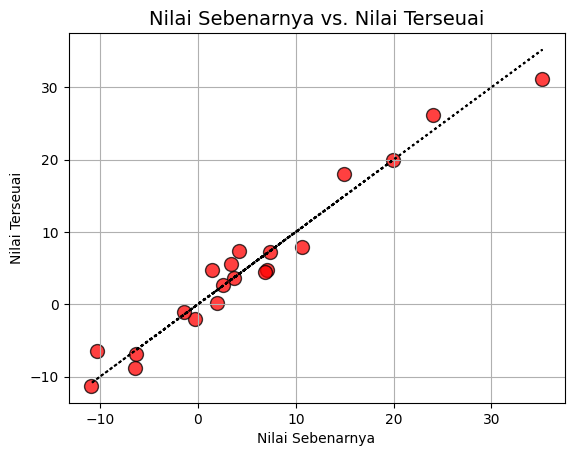

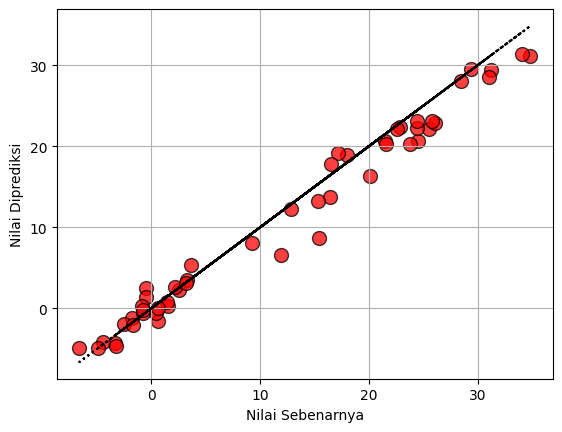

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class RegresiLinear:

    def __init__(self, fit_intercept=True):
        self.coef_ = None
        self.intercept_ = None
        self._fit_intercept = fit_intercept

    def __repr__(self):
        return "saya adalah model Regresi Linear"

    def fit(self, X, y):
        """
        Menyesuaikan koefisien model.

        Argumen:
        X: 1D atau 2D numpy array
        y: 1D numpy array
        """

        # Periksa apakah X adalah array 1D atau 2D
        if len(X.shape) == 1:
            X = X.reshape(-1, 1)

        # Tambahkan bias jika fit intercept bernilai True
        if self._fit_intercept:
            X_biased = np.c_[np.ones(X.shape[0]), X]
        else:
            X_biased = X

        # Solusi bentuk tertutup
        XTX = np.dot(X_biased.T, X_biased)
        inverse_XTX = np.linalg.inv(XTX)
        XTy = np.dot(X_biased.T, y)
        coef = np.dot(inverse_XTX, XTy)

        # Set atribut
        if self._fit_intercept:
            self.intercept_ = coef[0]
            self.coef_ = coef[1:]
        else:
            self.intercept_ = 0
            self.coef_ = coef

        # y prediksi/terseuai
        self.fitted_ = np.dot(X_biased, coef)

    def plot_fitted(self, reference_line=False):
        """
        Menyajikan nilai terseuai terhadap nilai output sebenarnya dari data

        Argumen:
        reference_line: Peralihan boolean untuk menggambar garis referensi 45 derajat pada plot
        """

        plt.title("Nilai Sebenarnya vs. Nilai Terseuai", fontsize=14)
        plt.scatter(y, self.fitted_, s=100, alpha=0.75, color="red", edgecolor='k')
        if reference_line:
            plt.plot(y, y, c='k', linestyle='dotted')
        plt.xlabel("Nilai Sebenarnya")
        plt.ylabel("Nilai Terseuai")
        plt.grid(True)
        plt.show()

    def predict(self, X):
        """Output prediksi model.

        Argumen:
        X: 1D atau 2D numpy array
        """

        # Periksa apakah X adalah array 1D atau 2D
        if len(X.shape) == 1:
            X = X.reshape(-1, 1)

        # Periksa apakah intercept sudah terpasang
        if self._fit_intercept:
            X_biased = np.c_[np.ones(X.shape[0]), X]
        else:
            X_biased = X

        self.predicted_ = np.dot(X_biased, np.hstack([self.intercept_, self.coef_]))

        return self.predicted_

# Generate data acak
num_samples = 20
X = 10 * np.random.random(size=(num_samples, 2))
y = 3.5 * X[:, 0] - 1.2 * X[:, 1] + 2 * np.random.randn(num_samples)

# Buat instance dari kelas RegresiLinear
rl = RegresiLinear()

# Sesuaikan model
rl.fit(X, y)

# Plot nilai terseuai
rl.plot_fitted(reference_line=True)

# Generate data baru untuk prediksi
num_new_samples = 50
X_new = 10 * np.random.random(size=(num_new_samples, 2))
y_new = 3.5 * X_new[:, 0] - 1.2 * X_new[:, 1] + 2 * np.random.randn(num_new_samples)

# Prediksi menggunakan model yang telah dilatih
y_pred = rl.predict(X_new)

# Plot nilai sebenarnya vs nilai yang diprediksi
plt.scatter(y_new, y_pred, s=100, alpha=0.75, color='red', edgecolor='k')
plt.plot(y_new, y_new, c="k", linestyle='dotted')
plt.xlabel("Nilai Sebenarnya")
plt.ylabel("Nilai Diprediksi")
plt.grid(True)
plt.show()
